In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

/tmp/ipykernel_4101499/3274186680.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import torch

torch.cuda.is_available()
#!/usr/bin/env python3

import sys,os
from elftools.elf.elffile import ELFFile
from elftools.elf.segments import Segment
from capstone import *
from capstone.x86 import *

import os
import json 

import sys,os
device = 'cuda:2' if torch.cuda.is_available() else 'cpu'


# DATASET GENERATION

# Creating the pipeline

In [3]:

MAX_TOKEN_LEN = 1024
BATCH_SIZE =44
epochs = 10

EXPERIMENT_NAME = 'cusTokenizer_WP_35k_ATW'
new_vocab_size = 35000
# disassembly_decimal disassembly_all_number_to_words disassembly_decimal 
data_key = "disassembly_addresses_to_words"



from transformers import BertTokenizer, BertForNextSentencePrediction,BertForPreTraining,BertConfig,AutoModelForMaskedLM,get_linear_schedule_with_warmup
import torch
from transformers import PreTrainedTokenizerFast ,AutoModelForPreTraining
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer = PreTrainedTokenizerFast.from_pretrained("./../../models/" + EXPERIMENT_NAME)
print(tokenizer.pad_token) 



config = BertConfig.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
# Change max_position_embeddings to 1024 in the config
config.max_position_embeddings = 1024
# Load the model with the modified config
model = BertForPreTraining(config)
# Access and modify the positional embeddings
# The model's `bert` attribute holds the BERT layers
model_bert = model.bert  # This is the BERT model itself (the backbone)
# Resize the position embeddings to accommodate the new max length (1024 tokens)
model_bert.embeddings.position_embeddings = torch.nn.Embedding(1024, model_bert.config.hidden_size)
# Optional: Initialize the new embeddings using the original ones for the first 512 positions
with torch.no_grad():
    model_bert.embeddings.position_embeddings.weight[:512, :] = model_bert.embeddings.position_embeddings.weight[:512, :]


model.resize_token_embeddings(new_vocab_size)

# and move our model over to the selected device
model.to(device)

[PAD]


The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


BertForPreTraining(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(35000, 384, padding_idx=0)
      (position_embeddings): Embedding(1024, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12, eleme

In [4]:



DATA_PATH = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions'

TRAIN_DATA_PATH  ='/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/train/'

TEST_DATA_PATH   = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/test/'




train_json_files = [os.path.join(TRAIN_DATA_PATH, f) for f in os.listdir(TRAIN_DATA_PATH) ]

test_json_files = [os.path.join(TEST_DATA_PATH, f) for f in os.listdir(TEST_DATA_PATH) ]


print(len(train_json_files))
def read_corpus(json_files):

    all = []

    for k, j_file in enumerate(json_files):
        # if k>1000:
        #     break
        try:

            with open(j_file, 'r') as file:
                data = json.load(file)

                funct = data[data_key]['input']
                
                all.append(funct)
        except Exception as e: 
            print(e)
    return all
    


train_text = read_corpus(train_json_files)
test_text  = read_corpus(test_json_files)


        
# text = text[0:5000]
print("Functions Count: ",len(train_text), '\n')
example = train_text[10]
text = train_text + test_text





80000
Functions Count:  80000 



In [5]:
print(text[-1])


ENDBR64
PUSH R15
LEA RDI,[8270]
PUSH R14
PUSH R13
PUSH R12
PUSH RBP
PUSH RBX
SUB RSP,8
CALL addr0
MOVSXD RCX,dword ptr [addr8]
CMP ECX,1
JLE addr6
XOR R13D,R13D
LEA RBX,[16576]
LEA R14,[16480]
LEA RBP,[8297]
LEA R12,[16640]
NOP dword ptr [RAX]
XOR EAX,EAX
MOV R15D,4294967295
MOV EDX,987654321
NOP dword ptr [RAX]
MOV ESI,dword ptr [RBX + RAX*4]
TEST ESI,ESI
JNZ addr5
MOV ESI,dword ptr [R12 + RAX*4]
CMP EDX,ESI
CMOVG R15D,EAX
CMOVG EDX,ESI
ADD RAX,1
CMP RCX,RAX
JNZ addr4
MOVSXD RAX,R15D
ADD dword ptr [addr7],EDX
MOV RSI,RBP
MOV EDX,R15D
MOV ECX,dword ptr [R14 + RAX*8]
MOV R8D,dword ptr [R14 + RAX*8 + 4]
MOV dword ptr [RBX + RAX*4],1
XOR EAX,EAX
MOV EDI,2
ADD R13D,1
CALL addr1
MOV EDI,R15D
CALL addr2
MOVSXD RCX,dword ptr [addr8]
LEA EAX,[RCX + -1]
CMP R13D,EAX
JL addr3
MOV EDX,dword ptr [addr7]
ADD RSP,8
LEA RSI,[8321]
XOR EAX,EAX
POP RBX
MOV EDI,2
POP RBP
POP R12
POP R13
POP R14
POP R15
JMP addr1



In [6]:
# text[51].split(delim)

We'll assign a 50% probability of using the genuine next sentence, and 50% probability of using another random sentence.

To make this simpler, we'll create a *'bag'* of individual sentences to pull from when selecting a random sentence B.

In [7]:
delim = '\n'
bag = [instruction for instruction_cluster in text for instruction in instruction_cluster.split(delim)  if instruction!= '']
bag_size = len(bag)
print(bag_size , len(text))

5312741 100000


And now we create our 50/50 NIP training data.

In [8]:
import random

history = []
next_instruction = []
label = []


instruction_pages = []
for instruction_cluster in text:
    instructions = [
        instruction for instruction in instruction_cluster.split(delim) if instruction != ''
    ]

    instruction_pages.append(instructions)

        
print(len(instruction_pages))
print(instruction_pages[0])

for instruction_page in instruction_pages:
        # this is IsNextSentence
        history.append(delim.join(instruction_page))
        next_instruction.append(instruction_page[-1])
        label.append(0)


100000
['ENDBR64', 'PUSH R12', 'LEA RSI,[4608]', 'MOV EDI,2', 'LEA R12,[8253]', 'PUSH RBP', 'LEA RBP,[8262]', 'PUSH RBX', 'XOR EBX,EBX', 'CALL addr1', 'JMP addr3', 'MOV RDI,RBP', 'ADD EBX,1', 'CALL addr0', 'CMP EBX,10000', 'JZ addr4', 'CMP EBX,100', 'JNZ addr2', 'MOV RDI,R12', 'MOV EBX,101', 'CALL addr0', 'MOV RDI,RBP', 'CALL addr0', 'JMP addr2', 'POP RBX', 'XOR EAX,EAX', 'POP RBP', 'POP R12', 'RET']


Our data is now ready for tokenization, this time we truncate/pad each token to the same length of *512* tokens.

In [9]:
inputs = tokenizer(history, next_instruction, return_tensors='pt', 
                   max_length=MAX_TOKEN_LEN, truncation=True, padding=True)
ground_truth = inputs.copy() 

In [10]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

We can see that the *token_type_ids* tensors have been built correctly (eg **1** indicating sentence B tokens) by checking the first instance of *token_type_ids*:

And the labels tensor is simply a clone of the input_ids tensor before masking.

In [11]:

inputs['next_sentence_label'] = torch.LongTensor([label]).T
inputs['labels'] = inputs.input_ids.detach().clone()

Now we mask tokens in the input_ids tensor using the 15% probability for MLM - ensuring we don't mask CLS, SEP, or PAD tokens.

In [12]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

In [13]:
mask_arr.shape
# inputs.input_ids.shape[0]

torch.Size([100000, 858])

And now take the indices of each True value within each vector.

In [14]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

In [15]:
len (selection) , len(inputs.input_ids), selection[0:3]

(100000,
 100000,
 [[1,
   13,
   17,
   18,
   25,
   29,
   47,
   56,
   59,
   62,
   66,
   74,
   77,
   79,
   101,
   105,
   108,
   116,
   119,
   147,
   154,
   175,
   177,
   178,
   179,
   186,
   203,
   211,
   213,
   248,
   251,
   252,
   254,
   255,
   257,
   273,
   275,
   283,
   285,
   293,
   305,
   313,
   314,
   325,
   332,
   333,
   344,
   348,
   349,
   352,
   362,
   368,
   382,
   385,
   387,
   414,
   429,
   438,
   439,
   473,
   486,
   489,
   490,
   495,
   508,
   517,
   522,
   535,
   536,
   544,
   554,
   565,
   566,
   573,
   574,
   575,
   593,
   603,
   606,
   607,
   615,
   621,
   622,
   623,
   639,
   649,
   652,
   653,
   669,
   675,
   677,
   681,
   684,
   698,
   700,
   703,
   704,
   715,
   717,
   720,
   749,
   760,
   767,
   771,
   785,
   799,
   801,
   805,
   809,
   814,
   817,
   824,
   828,
   831,
   840,
   850,
   855],
  [2,
   9,
   20,
   24,
   30,
   55,
   59,
   64,
   75,

Then apply these indices to each row in input_ids, assigning each value at these indices a value of 103.

In [16]:
masked_labels = []
for i in range(inputs.input_ids.shape[0]):
    masked_labels.append(inputs.input_ids[i, selection[i]])
    inputs.input_ids[i, selection[i]] = 103
# masked_labels[0]
inputs["mask_arr"] = mask_arr

In [17]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'next_sentence_label', 'labels', 'mask_arr'])

The `inputs` tensors are now ready, and we can begin building the model input pipeline for training. We first create a PyTorch dataset from our data.

In [18]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

Initialize our data using the `MeditationDataset` class.

In [19]:
dataset = MeditationsDataset(inputs)
# print(inputs.shape)

In [20]:


train_dataset  = torch.utils.data.Subset(dataset, range(len(train_text)))
validation_dataset = torch.utils.data.Subset(dataset, range(len(train_text) , len(dataset)))

len(train_dataset) , len(validation_dataset)

(80000, 20000)

And initialize the dataloader, which we'll be using to load our data into the model during training.

In [21]:

train_loader      = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False )



Activate the training mode of our model, and initialize our optimizer (Adam with weighted decay - reduces chance of overfitting).

In [22]:
from sklearn.metrics import precision_recall_fscore_support , accuracy_score
import numpy as np


Now we can move onto the training loop, we'll train for a couple of epochs (change `epochs` to modify this).

In [23]:
# odict_keys(['loss', 'prediction_logits', 'seq_relationship_logits'])

In [24]:

from numpy import *
import math
import matplotlib.pyplot as plt


def plot_graph(training_data, validation_data , label ):

    font_size = 10
    x_labels = [ i for i in range(len(training_data)) ]

    plt.ylabel(' F1 ',fontsize=font_size)
    plt.plot(x_labels, training_data , 'r') 
    plt.plot(x_labels, validation_data , 'b') 
    plt.xlabel("Epoch", fontsize=font_size)
    plt.title(label,fontsize=font_size)
    plt.legend(['Training', 'Validation'], loc='upper left') 
    
    plt.savefig('./../../results/'+EXPERIMENT_NAME+label+'.pdf')
    plt.show()
    with open('./../../results/'+EXPERIMENT_NAME+label+'.json', 'w') as json_file:
        json.dump([training_data, validation_data , label], json_file)



In [25]:
from transformers import AdamW
from tqdm import tqdm  # for our progress bar
from itertools import chain



# initialize optimizer
optim = AdamW(model.parameters(), lr=3e-4 ,weight_decay=0.0001)

# Number of training steps per epoch
train_steps = len(train_loader)

# Define the number of total training steps and warmup steps
total_steps = train_steps * epochs
warmup_steps = int(total_steps * 0.1)  # 10% of total steps as warmup

# Scheduler setup
scheduler = get_linear_schedule_with_warmup(optim,
                                            num_warmup_steps=warmup_steps,
                                            num_training_steps=total_steps)

/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 0: 100%|██████████| 1819/1819 [21:56<00:00,  1.38it/s, loss=0.373]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.7044737449041075  masked_token_precision:  0.68453709760937  masked_token_recall:  0.7405511086576502  masked_token_accuracy  0.7405511086576502     SEQ F1 0.7325850699862942


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:50<00:00,  4.13it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

0 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.7514738952948625 v_seq_accuracy:  0.9515588578088578  v_masked_token_precision :  0.763680153134412 v_masked_token_recall: 0.7740971581752638  V SEQ F1:  0.9518679768877405


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


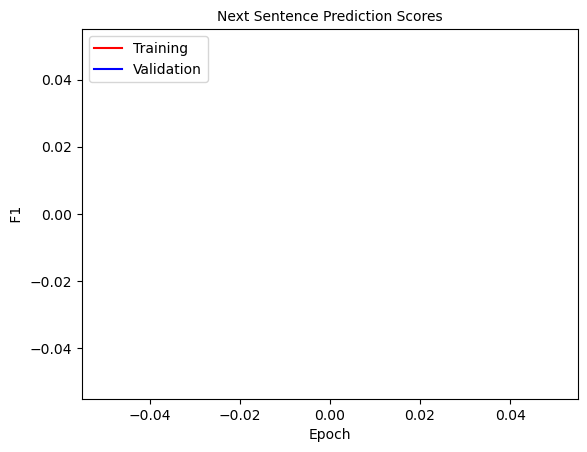

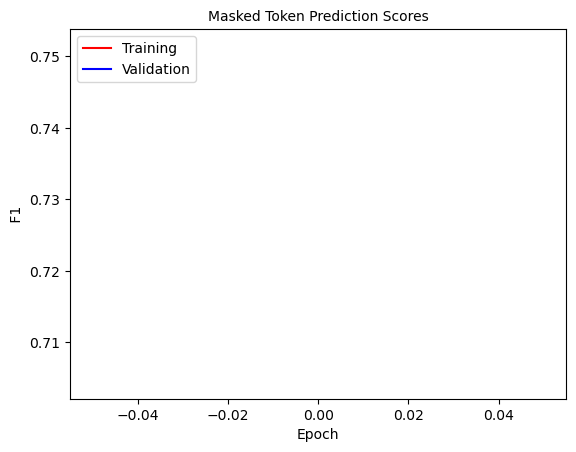

[2024-12-24 00:28:24,326] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1: 100%|██████████| 1819/1819 [22:13<00:00,  1.36it/s, loss=0.139]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this beha

Training:   Instruction f1:  0.0   Masked Token f1:  0.7647098950137602  masked_token_precision:  0.7816763222337162  masked_token_recall:  0.7801820715953826  masked_token_accuracy  0.7801820715953826     SEQ F1 0.9560447088244846


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:50<00:00,  4.12it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

1 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8251221716404981 v_seq_accuracy:  0.9742603729603729  v_masked_token_precision :  0.8282691300362827 v_masked_token_recall: 0.8390622154601688  V SEQ F1:  0.9741005254848114


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


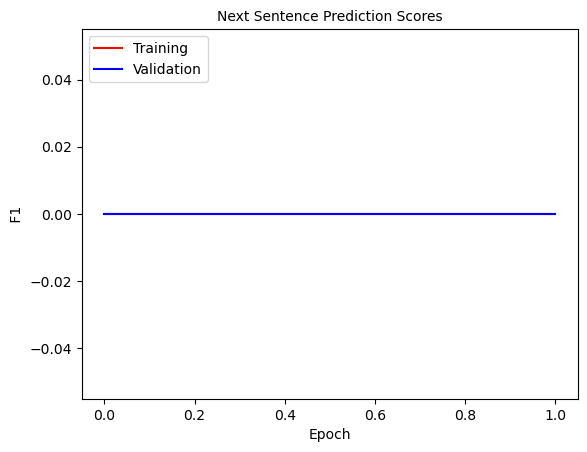

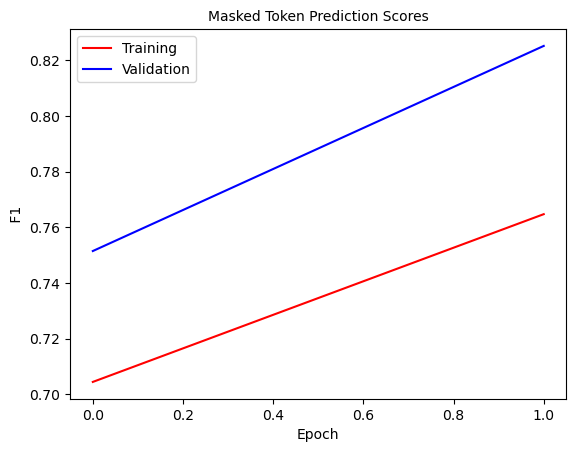

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 2: 100%|█████████| 1819/1819 [22:12<00:00,  1.37it/s, loss=0.0515]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8831384847986941  masked_token_precision:  0.8808469436943217  masked_token_recall:  0.8910013448358889  masked_token_accuracy  0.8910013448358889     SEQ F1 0.9806233476784302


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:50<00:00,  4.12it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

2 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9270513416705202 v_seq_accuracy:  0.9886348484848485  v_masked_token_precision :  0.9270065324388361 v_masked_token_recall: 0.9309894594208262  V SEQ F1:  0.9884964455875186


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


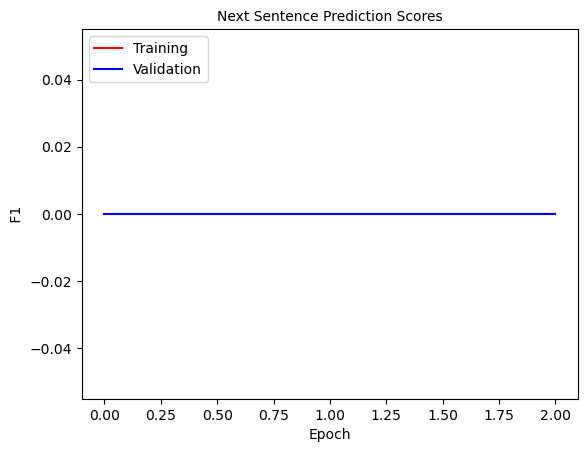

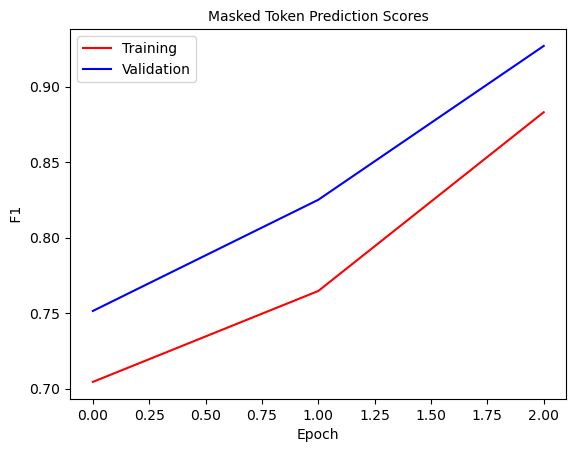

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3: 100%|█████████| 1819/1819 [22:13<00:00,  1.36it/s, loss=0.0402]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9282006378886015  masked_token_precision:  0.9270361717536642  masked_token_recall:  0.9318630185790938  masked_token_accuracy  0.9318630185790938     SEQ F1 0.9880637229091429


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:49<00:00,  4.14it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

3 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.942725575523029 v_seq_accuracy:  0.9910117132867133  v_masked_token_precision :  0.9430768277885743 v_masked_token_recall: 0.9452387246349568  V SEQ F1:  0.9909080030546684


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


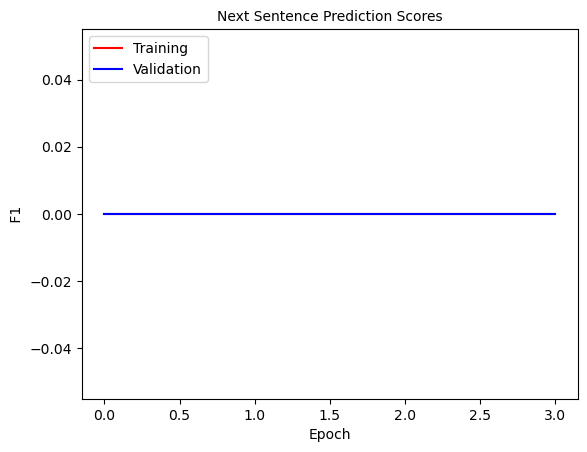

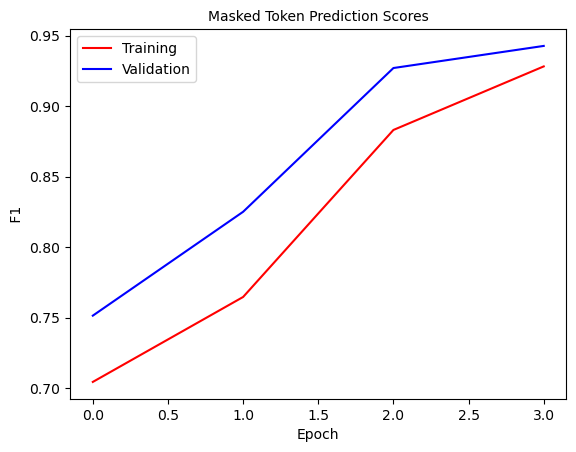

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 4: 100%|█████████| 1819/1819 [22:10<00:00,  1.37it/s, loss=0.0331]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9410358093071662  masked_token_precision:  0.9402769293695266  masked_token_recall:  0.9435591757154351  masked_token_accuracy  0.9435591757154351     SEQ F1 0.9902655368476025


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:49<00:00,  4.15it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

4 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9496467103214066 v_seq_accuracy:  0.9920681818181818  v_masked_token_precision :  0.9502290450193764 v_masked_token_recall: 0.9514393187296477  V SEQ F1:  0.9919861406502097


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


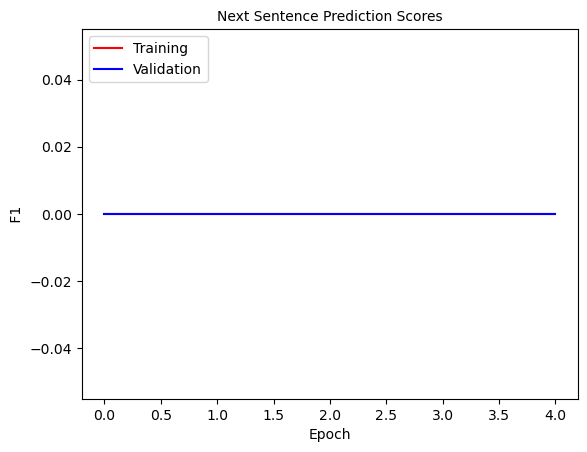

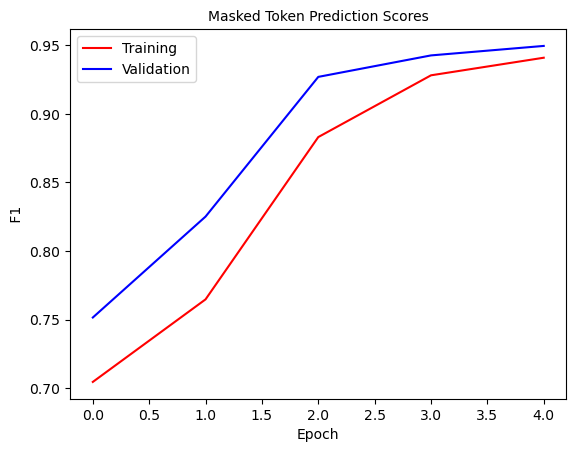

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 5: 100%|█████████| 1819/1819 [22:22<00:00,  1.36it/s, loss=0.0289]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9479260440045897  masked_token_precision:  0.9472550586291519  masked_token_recall:  0.9499221874431087  masked_token_accuracy  0.9499221874431087     SEQ F1 0.9914523953930653


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:50<00:00,  4.13it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

5 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9546435384961939 v_seq_accuracy:  0.992845337995338  v_masked_token_precision :  0.9548840348206069 v_masked_token_recall: 0.956183852138173  V SEQ F1:  0.9927653034490835


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


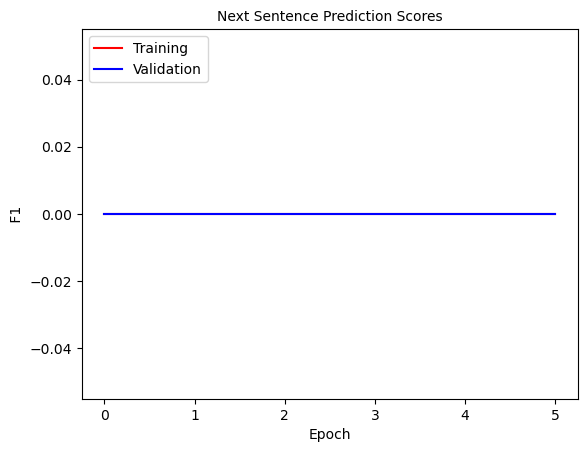

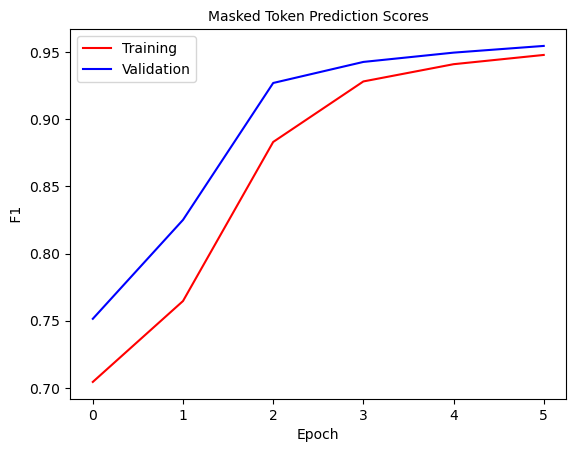

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 6: 100%|█████████| 1819/1819 [22:16<00:00,  1.36it/s, loss=0.0241]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.95276052853893  masked_token_precision:  0.9521316335830537  masked_token_recall:  0.95445117188647  masked_token_accuracy  0.95445117188647     SEQ F1 0.9922851751150752


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:50<00:00,  4.12it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

6 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9581042938994593 v_seq_accuracy:  0.9933670163170163  v_masked_token_precision :  0.9583266656266589 v_masked_token_recall: 0.9593391724578171  V SEQ F1:  0.9932953057003648


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


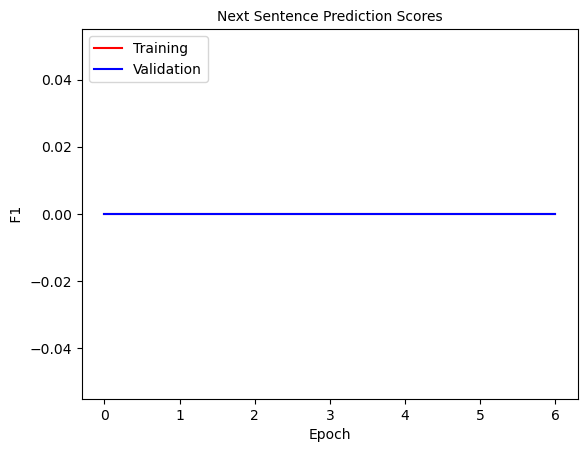

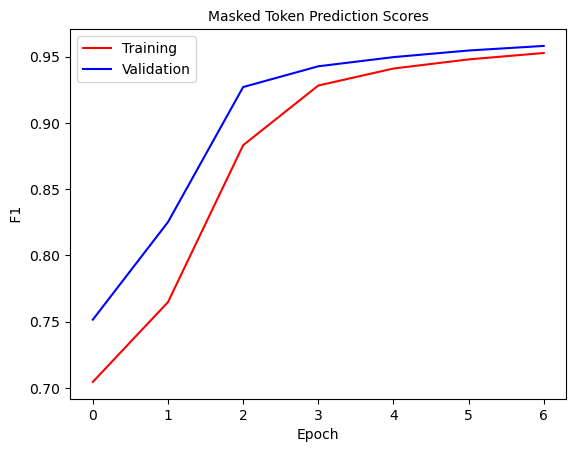

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 7: 100%|█████████| 1819/1819 [22:12<00:00,  1.36it/s, loss=0.0212]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.95648236849195  masked_token_precision:  0.9558891828486279  masked_token_recall:  0.9579748572457683  masked_token_accuracy  0.9579748572457683     SEQ F1 0.992912751560767


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:49<00:00,  4.16it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

7 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9607663151344162 v_seq_accuracy:  0.9938009324009324  v_masked_token_precision :  0.9608251377729301 v_masked_token_recall: 0.9619438684297611  V SEQ F1:  0.9937343273628171


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


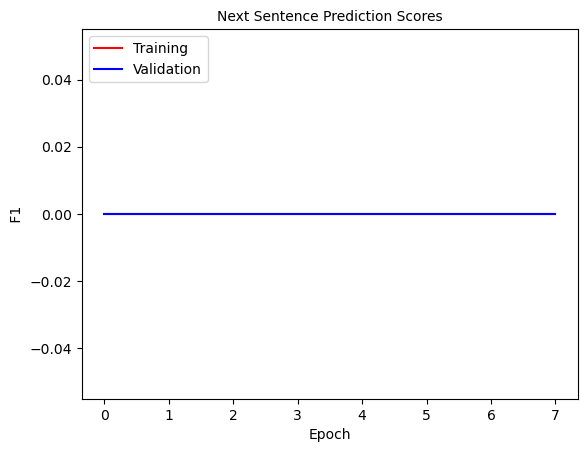

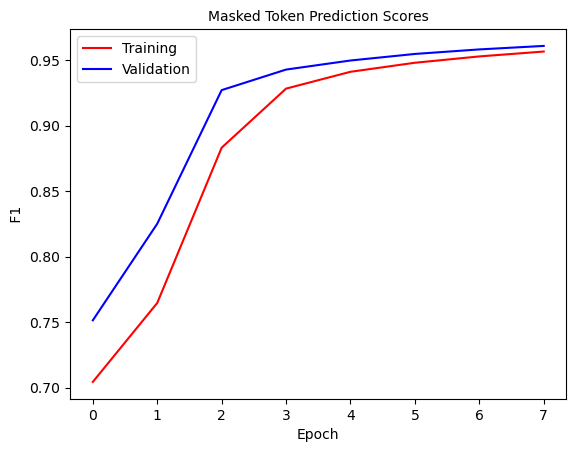

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 8: 100%|█████████| 1819/1819 [22:09<00:00,  1.37it/s, loss=0.0165]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9593818118043734  masked_token_precision:  0.958840523387671  masked_token_recall:  0.9607351965280918  masked_token_accuracy  0.9607351965280918     SEQ F1 0.9934036948972028


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:49<00:00,  4.15it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

8 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9625656860701014 v_seq_accuracy:  0.9940831585081585  v_masked_token_precision :  0.9622907975289868 v_masked_token_recall: 0.963695605774898  V SEQ F1:  0.9940111737764814


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


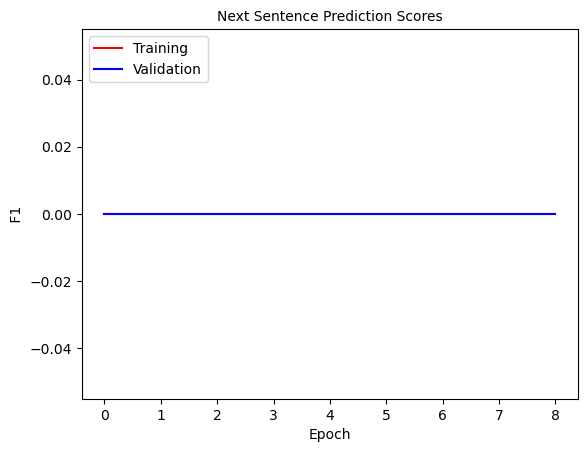

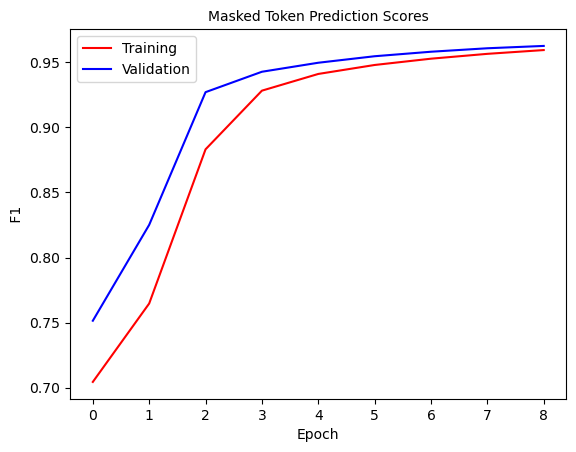

  0%|                                          | 0/1819 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 9: 100%|██████████| 1819/1819 [22:07<00:00,  1.37it/s, loss=0.015]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9614672844670594  masked_token_precision:  0.9609699342582613  masked_token_recall:  0.9627324833657308  masked_token_accuracy  0.9627324833657308     SEQ F1 0.9937495892234657


  0%|                                           | 0/455 [00:00<?, ?it/s]/tmp/ipykernel_4101499/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 455/455 [01:48<00:00,  4.18it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

9 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.963560827585167 v_seq_accuracy:  0.9942280303030303  v_masked_token_precision :  0.963153311356027 v_masked_token_recall: 0.9645661875138293  V SEQ F1:  0.9941549493669231


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


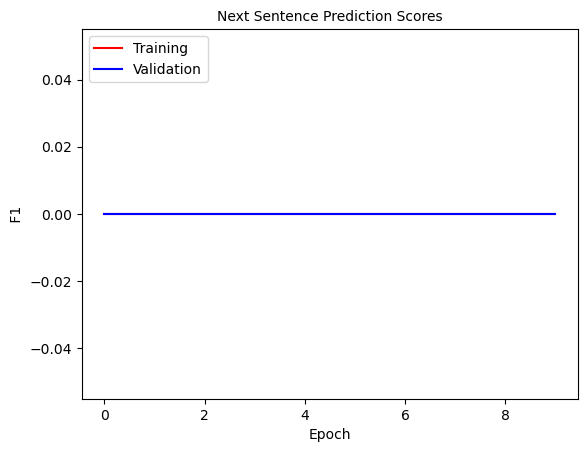

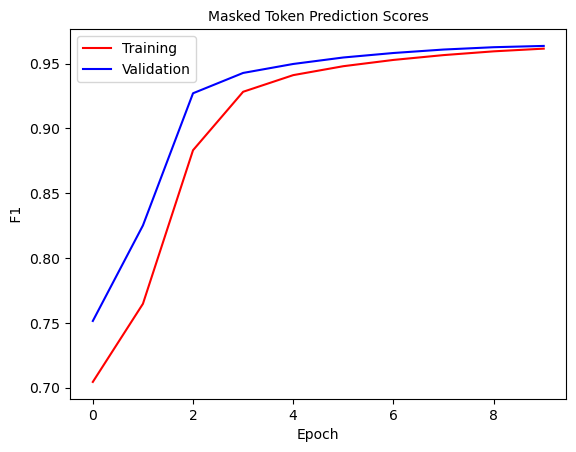

In [26]:


counter = 0

global_instruction_metrices = []
global_masked_token_metrices = []

v_global_instruction_metrices = []
v_global_masked_token_metrices = []


for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    train_loop = tqdm(train_loader, leave=True)
    
    
    instruction_predictions_all, instruction_ground_truths_all = None, None
    masked_token_predictions_all, masked_token_ground_truths_all = None, None
    seq_predictions_all, seq_ground_truths_all = None, None
    
    # activate training mode
    model.train()
    for N,batch in enumerate(train_loop):

        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        next_sentence_label = batch['next_sentence_label'].to(device)
        batch_mask_arr = batch ['mask_arr']
        labels = batch['labels'].to(device)

        # process
        outputs = model(input_ids, attention_mask=attention_mask,
                        token_type_ids=token_type_ids,
                        next_sentence_label=next_sentence_label,
                        labels=labels)


        token_prediction = torch.argmax(outputs.prediction_logits, axis=-1)
       


        # batch_masks = selection [BATCH_SIZE*N : (BATCH_SIZE*(N+1))]
        # print('batch_masks old: ',batch_masks)

        # print(batch ['mask_arr'].shape) #torch.flatten(mask_arr[i].nonzero()).tolist()
        batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in batch_mask_arr]    # torch.flatten(batch ['mask_arr'].nonzero()).tolist()
        # print('batch_masks new: ',batch_masks)
        
        # print("BATCH_SIZE*N : (BATCH_SIZE*(N+1)): ",BATCH_SIZE*N , (BATCH_SIZE*(N+1)) )
        # print("batch_masks:",batch_masks)



        

        masked_token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
        masked_token_prediction = list(chain.from_iterable(masked_token_prediction))
        
        masked_token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
        masked_token_ground_truth = list(chain.from_iterable(masked_token_ground_truth))
        

        # print(token_prediction , token_ground_truth)

        # token_prediction = token_prediction.detach().cpu().numpy().flatten()
        # token_ground_truth = labels.detach().cpu().numpy().flatten()

        # print("token_prediction  : ", token_prediction)
        # print("token_ground_truth: ", token_ground_truth)


        seq_predictions   = token_prediction.detach().cpu().numpy().flatten()
        seq_ground_truths = labels.detach().cpu().numpy().flatten()

        
        instruction_prediction = torch.argmax(outputs.seq_relationship_logits, axis=-1)
        instruction_prediction   = instruction_prediction.detach().cpu().numpy().flatten()
        instruction_ground_truth = next_sentence_label.detach().cpu().numpy().flatten()
        
        if N==0:
            instruction_predictions_all   = instruction_prediction
            instruction_ground_truths_all = instruction_ground_truth
            
            masked_token_predictions_all         = masked_token_prediction
            masked_token_ground_truths_all       = masked_token_ground_truth  


            seq_predictions_all = seq_predictions
            seq_ground_truths_all = seq_ground_truths
            
        else:
            instruction_predictions_all   = np.concatenate((instruction_predictions_all, instruction_prediction))
            instruction_ground_truths_all = np.concatenate((instruction_ground_truths_all, instruction_ground_truth))
            
            masked_token_predictions_all   = np.concatenate((masked_token_predictions_all, masked_token_prediction))
            masked_token_ground_truths_all = np.concatenate((masked_token_ground_truths_all, masked_token_ground_truth))

            seq_predictions_all = np.concatenate((seq_predictions_all, seq_predictions))
            seq_ground_truths_all = np.concatenate((seq_ground_truths_all, seq_ground_truths))
            

        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        scheduler.step()
        # print relevant info to progress bar
        train_loop.set_description(f'Epoch {epoch}')
        train_loop.set_postfix(loss=loss.item())
    
    
    instruction_accuracy = (accuracy_score(instruction_ground_truths_all,instruction_predictions_all))
    instruction_precision, instruction_recall, instruction_f1, _ = precision_recall_fscore_support(instruction_ground_truths_all,instruction_predictions_all, average='binary')
    
    masked_token_accuracy = (accuracy_score(masked_token_ground_truths_all, masked_token_predictions_all))
    masked_token_precision, masked_token_recall, masked_token_f1, _ = precision_recall_fscore_support(masked_token_ground_truths_all,masked_token_predictions_all,average='weighted')

    seq_precision, seq_recall, seq_f1, _ = precision_recall_fscore_support(seq_ground_truths_all,seq_predictions_all,average='weighted')
    
    print("Training: ",  ' Instruction f1: ', instruction_f1 , '  Masked Token f1: ',masked_token_f1 , ' masked_token_precision: ', masked_token_precision, ' masked_token_recall: ', masked_token_recall, ' masked_token_accuracy ', masked_token_accuracy,"    SEQ F1",seq_f1)
    global_instruction_metrices.append(instruction_f1)
    global_masked_token_metrices.append( masked_token_f1) 

    ###########################################
    ###############  EVAL Validation  #########
    ###########################################
    with torch.no_grad():
        model.eval()
#         v_predictions_all, v_ground_truths_all = None, None
        
        v_instruction_predictions_all, v_instruction_ground_truths_all = None, None
        v_masked_token_predictions_all, v_masked_token_ground_truths_all = None, None
        v_seq_predictions_all, v_seq_ground_truths_all = None, None
    
    
        validation_loop = tqdm(validation_loader, leave=True)
        for N,v_batch in enumerate(validation_loop):
            
            
            
            v_input_ids = v_batch['input_ids'].to(device)
            v_token_type_ids = v_batch['token_type_ids'].to(device)
            v_attention_mask = v_batch['attention_mask'].to(device)
            v_next_sentence_label = v_batch['next_sentence_label'].to(device)
            v_mask_arr = v_batch ['mask_arr']
            v_labels = v_batch['labels'].to(device)
            # process
            v_outputs = model(v_input_ids, attention_mask=v_attention_mask,
                            token_type_ids=v_token_type_ids,
                            next_sentence_label=v_next_sentence_label,
                            labels=v_labels)
        
            v_token_prediction = torch.argmax(v_outputs.prediction_logits, axis=-1)

                    

            v_batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in v_mask_arr]
            
            v_masked_token_prediction = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_token_prediction) ]
            v_masked_token_prediction = list(chain.from_iterable(v_masked_token_prediction))
            
            v_masked_token_ground_truth   = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_labels) ]
            v_masked_token_ground_truth = list(chain.from_iterable(v_masked_token_ground_truth))
    
            
            

            v_seq_prediction = v_token_prediction.detach().cpu().numpy().flatten()
            v_seq_ground_truth = v_labels.detach().cpu().numpy().flatten()


            

            # token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
            # token_prediction = list(chain.from_iterable(token_prediction))
            
            # token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
            # token_ground_truth = list(chain.from_iterable(token_ground_truth))

            
            v_instruction_prediction = torch.argmax(v_outputs.seq_relationship_logits, axis=-1)
            v_instruction_prediction   = v_instruction_prediction.detach().cpu().numpy().flatten()
            v_instruction_ground_truth = v_next_sentence_label.detach().cpu().numpy().flatten()



        

            if N==0:
                v_instruction_predictions_all   = v_instruction_prediction
                v_instruction_ground_truths_all = v_instruction_ground_truth

                v_masked_token_predictions_all   = v_masked_token_prediction
                v_masked_token_ground_truths_all = v_masked_token_ground_truth
                
                v_seq_predictions_all= v_seq_prediction
                v_seq_ground_truths_all = v_seq_ground_truth

        

            else:
                v_instruction_predictions_all   = np.concatenate((v_instruction_predictions_all, v_instruction_prediction))
                v_instruction_ground_truths_all = np.concatenate((v_instruction_ground_truths_all, v_instruction_ground_truth))

                v_masked_token_predictions_all   = np.concatenate((v_masked_token_predictions_all, v_masked_token_prediction ))
                v_masked_token_ground_truths_all = np.concatenate((v_masked_token_ground_truths_all, v_masked_token_ground_truth ))
                
                v_seq_predictions_all =np.concatenate((v_seq_predictions_all, v_seq_prediction ))
                v_seq_ground_truths_all =np.concatenate((v_seq_ground_truths_all, v_seq_ground_truth ))
                

            

        v_instruction_accuracy = (accuracy_score(v_instruction_ground_truths_all,v_instruction_predictions_all))
        v_instruction_precision, v_instruction_recall, v_instruction_f1, _ = precision_recall_fscore_support(v_instruction_ground_truths_all,v_instruction_predictions_all, average='binary')


        v_masked_token_accuracy = (accuracy_score(v_masked_token_ground_truths_all, v_masked_token_predictions_all))
        v_masked_token_precision, v_masked_token_recall, v_masked_token_f1, _ = precision_recall_fscore_support(v_masked_token_ground_truths_all,v_masked_token_predictions_all,average='weighted')


        v_seq_accuracy = (accuracy_score(v_seq_predictions_all, v_seq_ground_truths_all))
        v_seq_precision, v_seq_recall, v_seq_f1, _ = precision_recall_fscore_support(v_seq_ground_truths_all,v_seq_predictions_all,average='weighted')
    
        print(epoch,"Validation: ", "Instruction F1: ", v_instruction_f1,  "   v_masked_token_ F1: ",v_masked_token_f1,'v_seq_accuracy: ',v_seq_accuracy,' v_masked_token_precision : ',v_masked_token_precision,'v_masked_token_recall:', v_masked_token_recall," V SEQ F1: ", v_seq_f1)
        
        v_global_instruction_metrices.append(v_instruction_f1)
        v_global_masked_token_metrices.append(v_masked_token_f1) 

    
    plot_graph(global_instruction_metrices, v_global_instruction_metrices, 'Next Sentence Prediction Scores')
    plot_graph(global_masked_token_metrices, v_global_masked_token_metrices, 'Masked Token Prediction Scores')
    model.save_pretrained("./../../models/"+EXPERIMENT_NAME+"_model.ckpt")

In [27]:
a=[0,1,2,3,4,5]
a[0:3]

[0, 1, 2]